# Linear Regression

White wine quality prediction using Linear Regression.

Note: The output varable is not a pure continuous variable. However, linear regression techniques were used to learn and build a model for predictions.


**import the necessary libraries**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for comparison purposes
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler


### Dataset

**importing the dataset**

In [2]:
wine_df = pd.read_csv('WineQT.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
#drop "Id"
wine_df.drop('Id',axis=1,inplace=True)
wine_df.shape

(1143, 12)

In [4]:
# Reading data
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Get statistics on the dataset** 

In [5]:
#Statistical summary of the dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
pd.DataFrame({'Missing Values': wine_df.isnull().sum()})

,Missing Values
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### Checking the Wine Quality distribution 

In [7]:
# Functions to visualize features

def feature_viz(feature):
    plt.figure(figsize=(15,8))
    plt.title(f'{feature} hist plot')
    plt.subplot(1,3,1)
    wine_df[feature].plot(kind='hist')

    plt.subplot(1,3,2)
    plt.title(f'{feature} box plot')
    sns.boxplot(wine_df[feature])
    
    plt.subplot(1, 3, 3)
    plt.title(f'{feature} density plot')
    sns.kdeplot(wine_df[feature])
    plt.tight_layout()

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-p

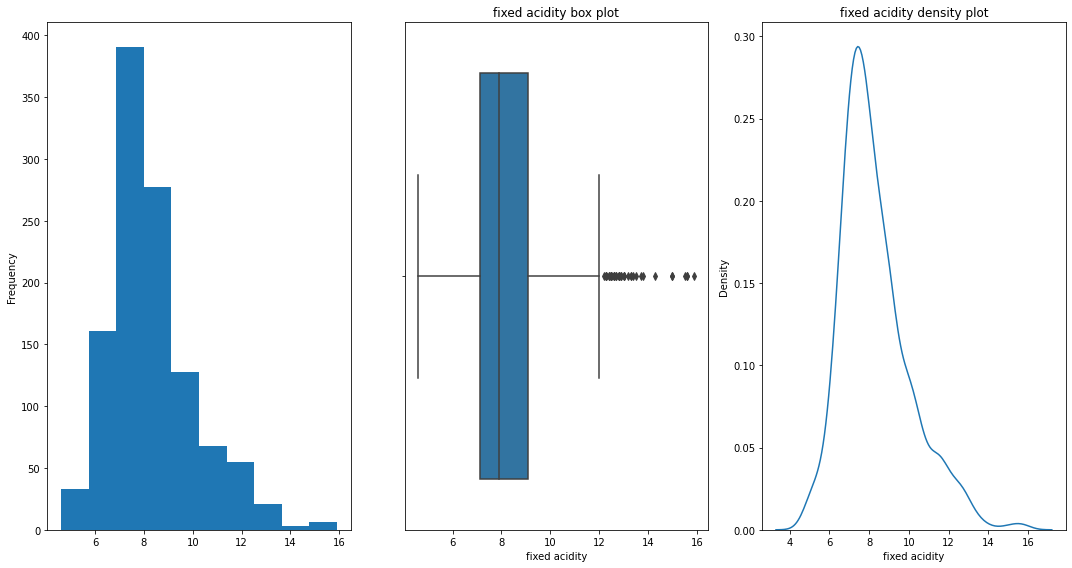

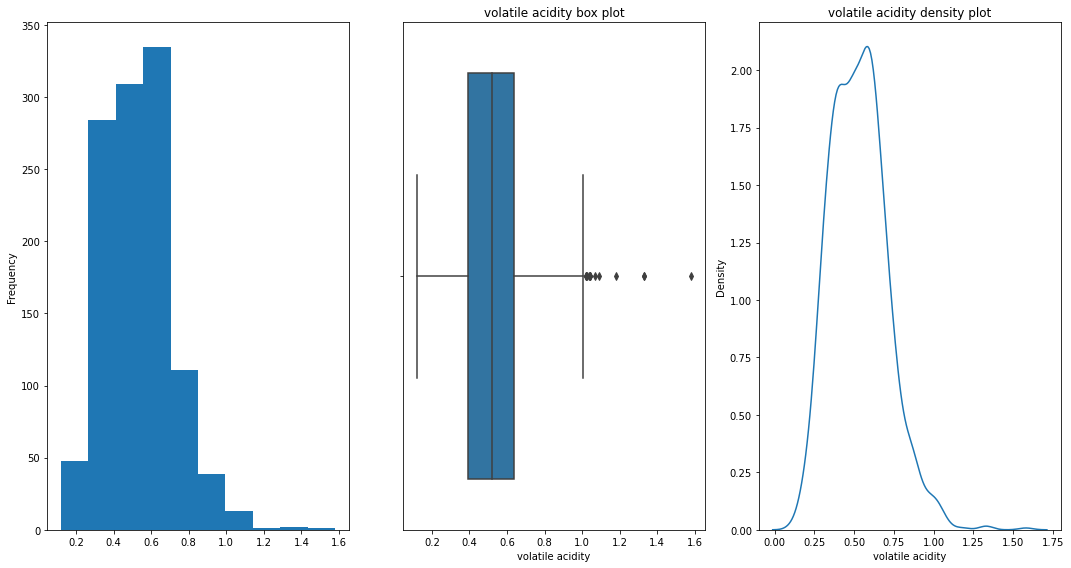

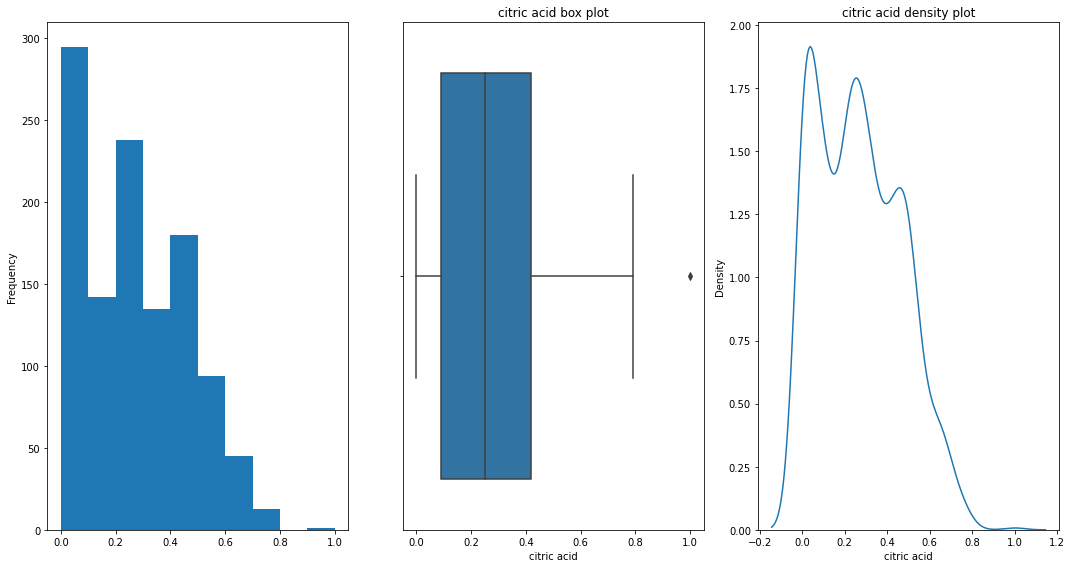

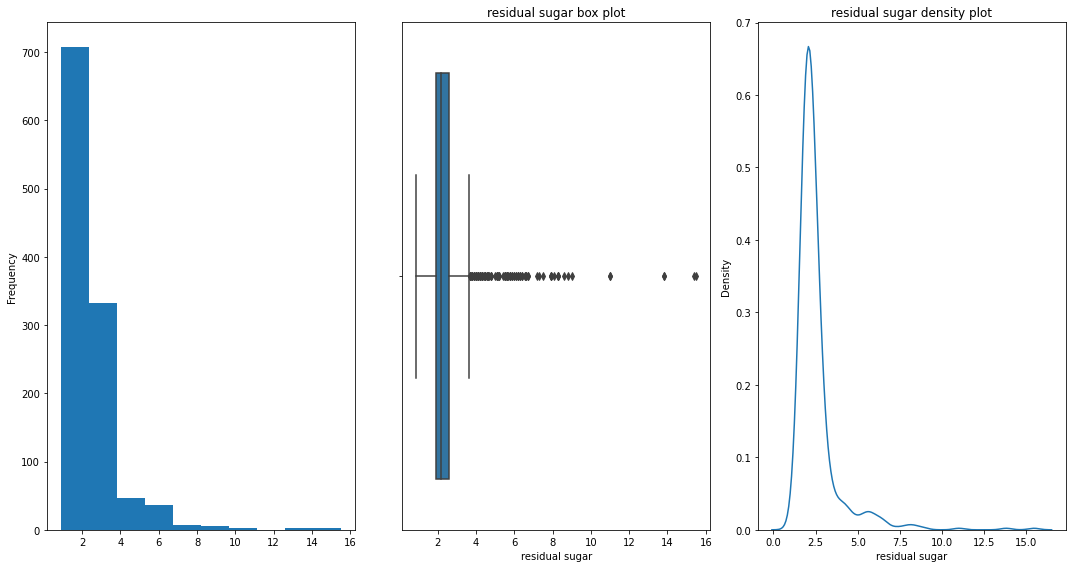

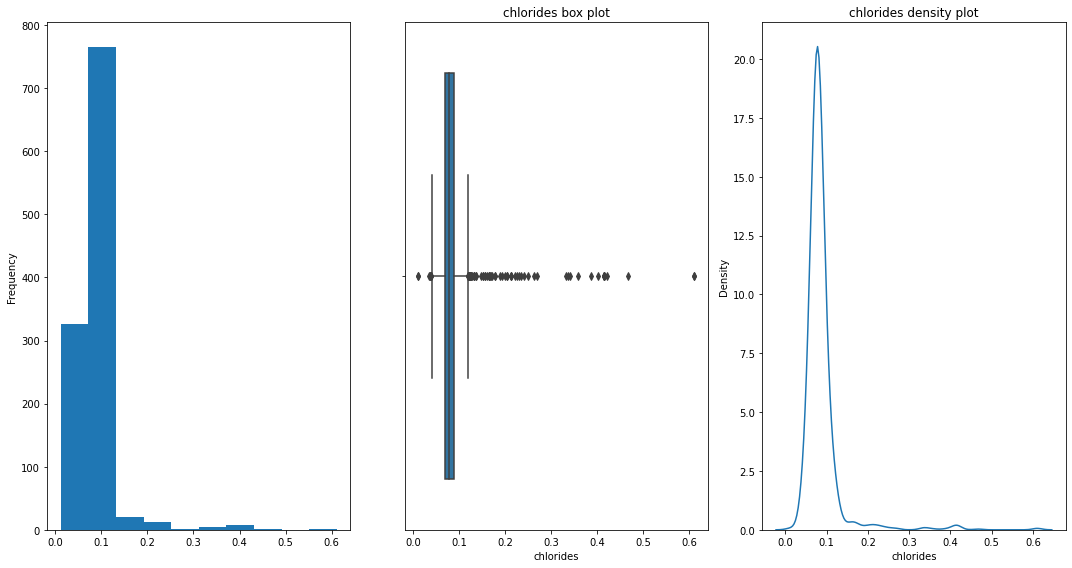

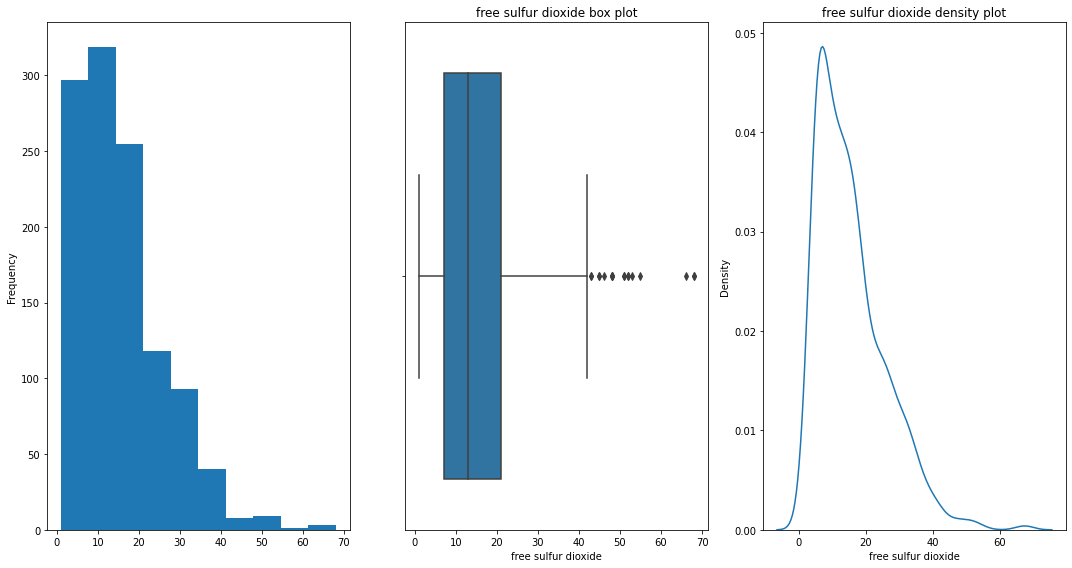

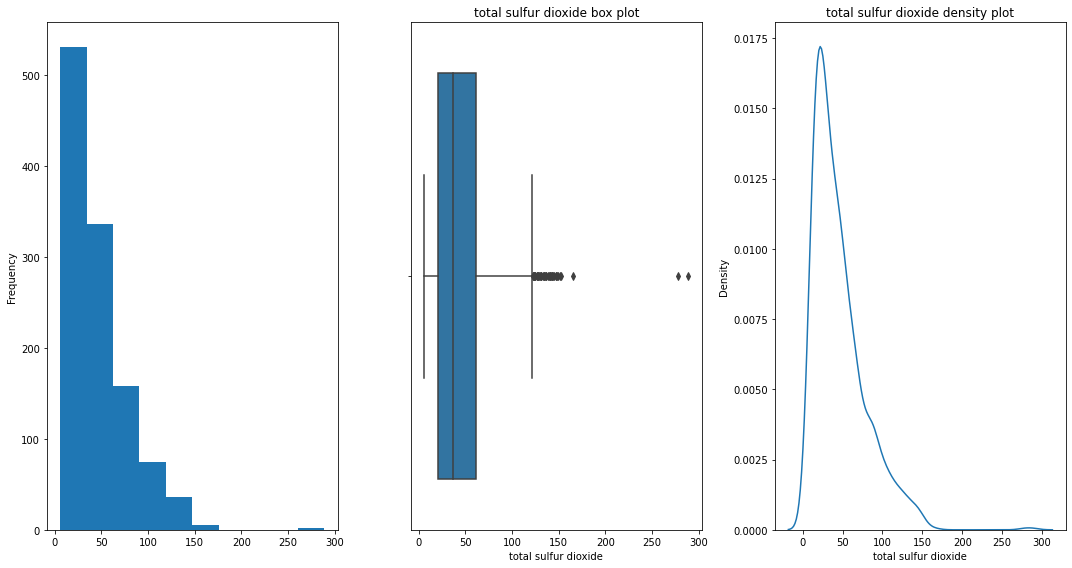

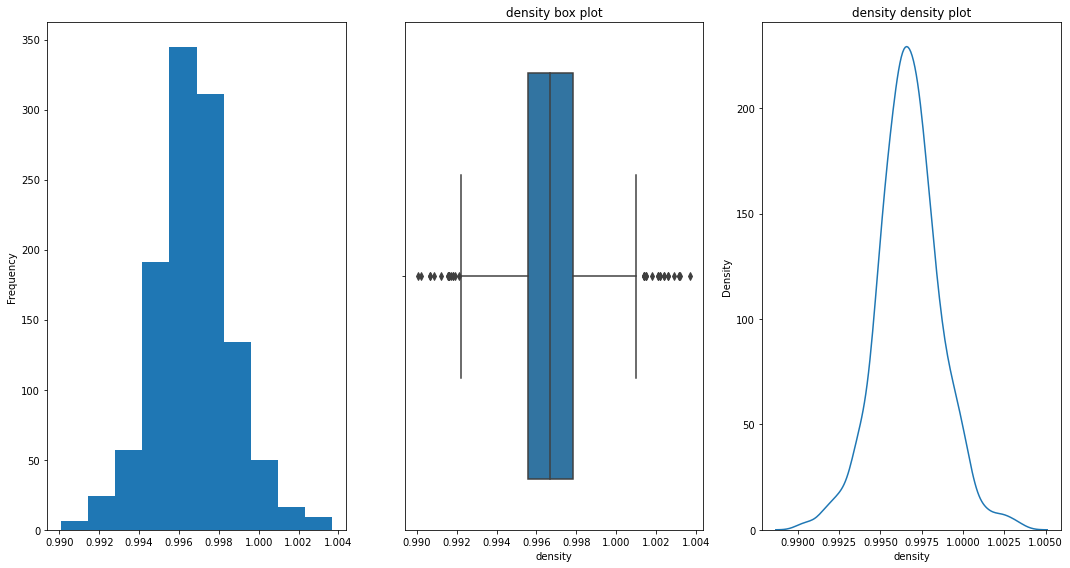

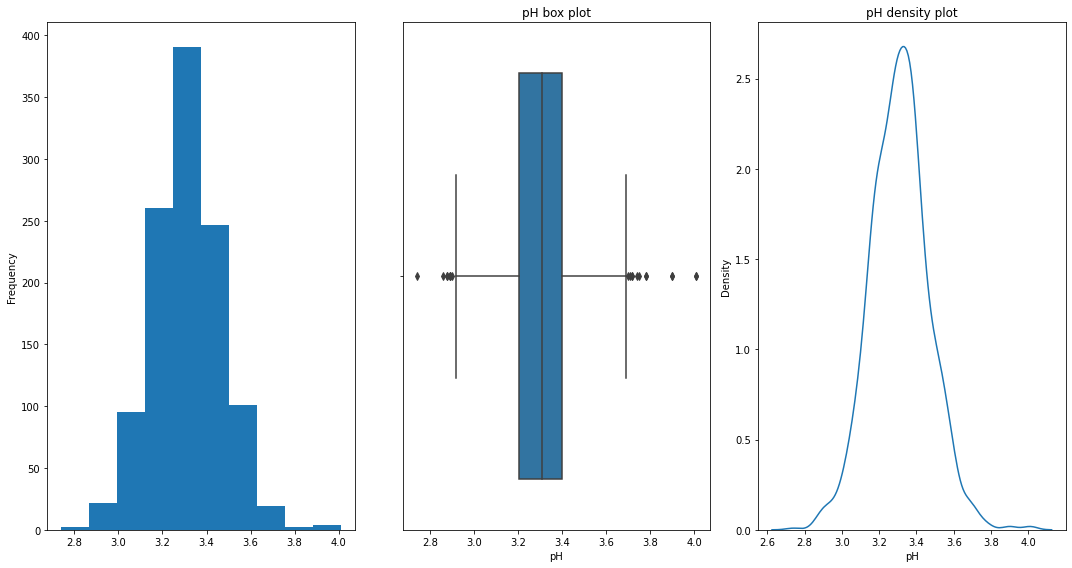

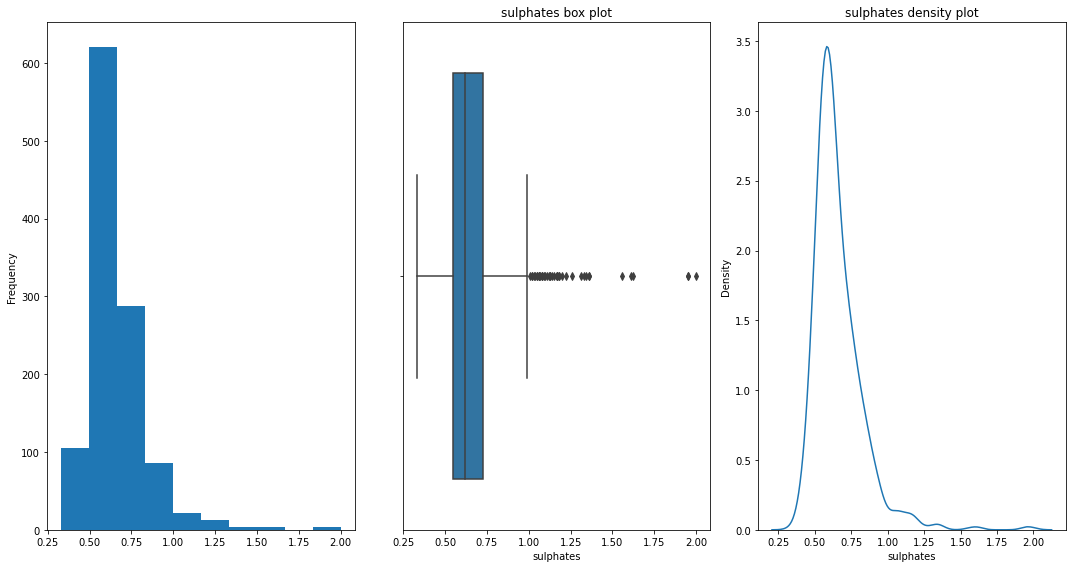

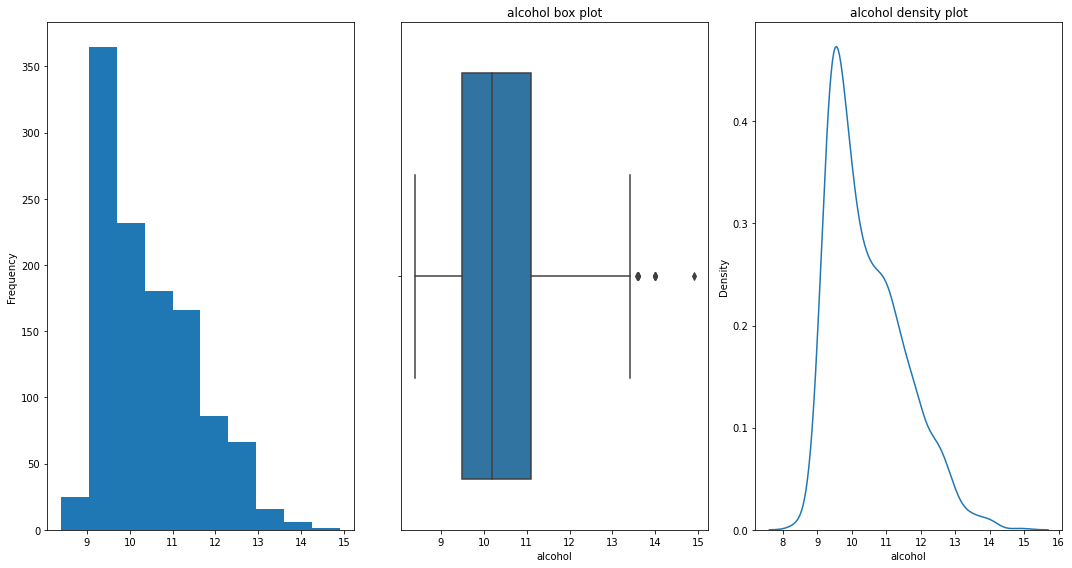

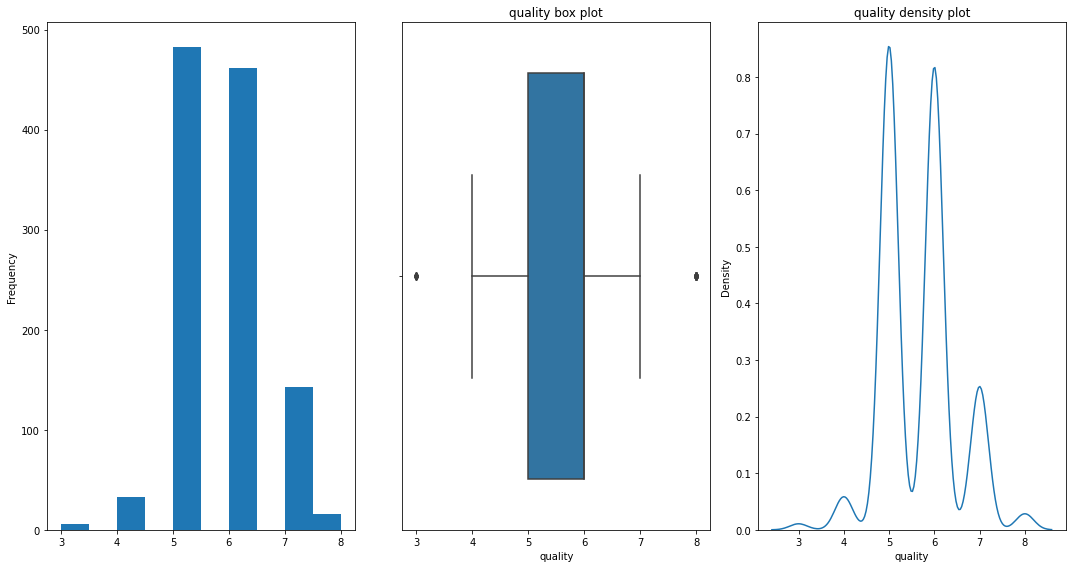

In [8]:
for col in wine_df.columns:
    feature_viz(col)

<AxesSubplot:>

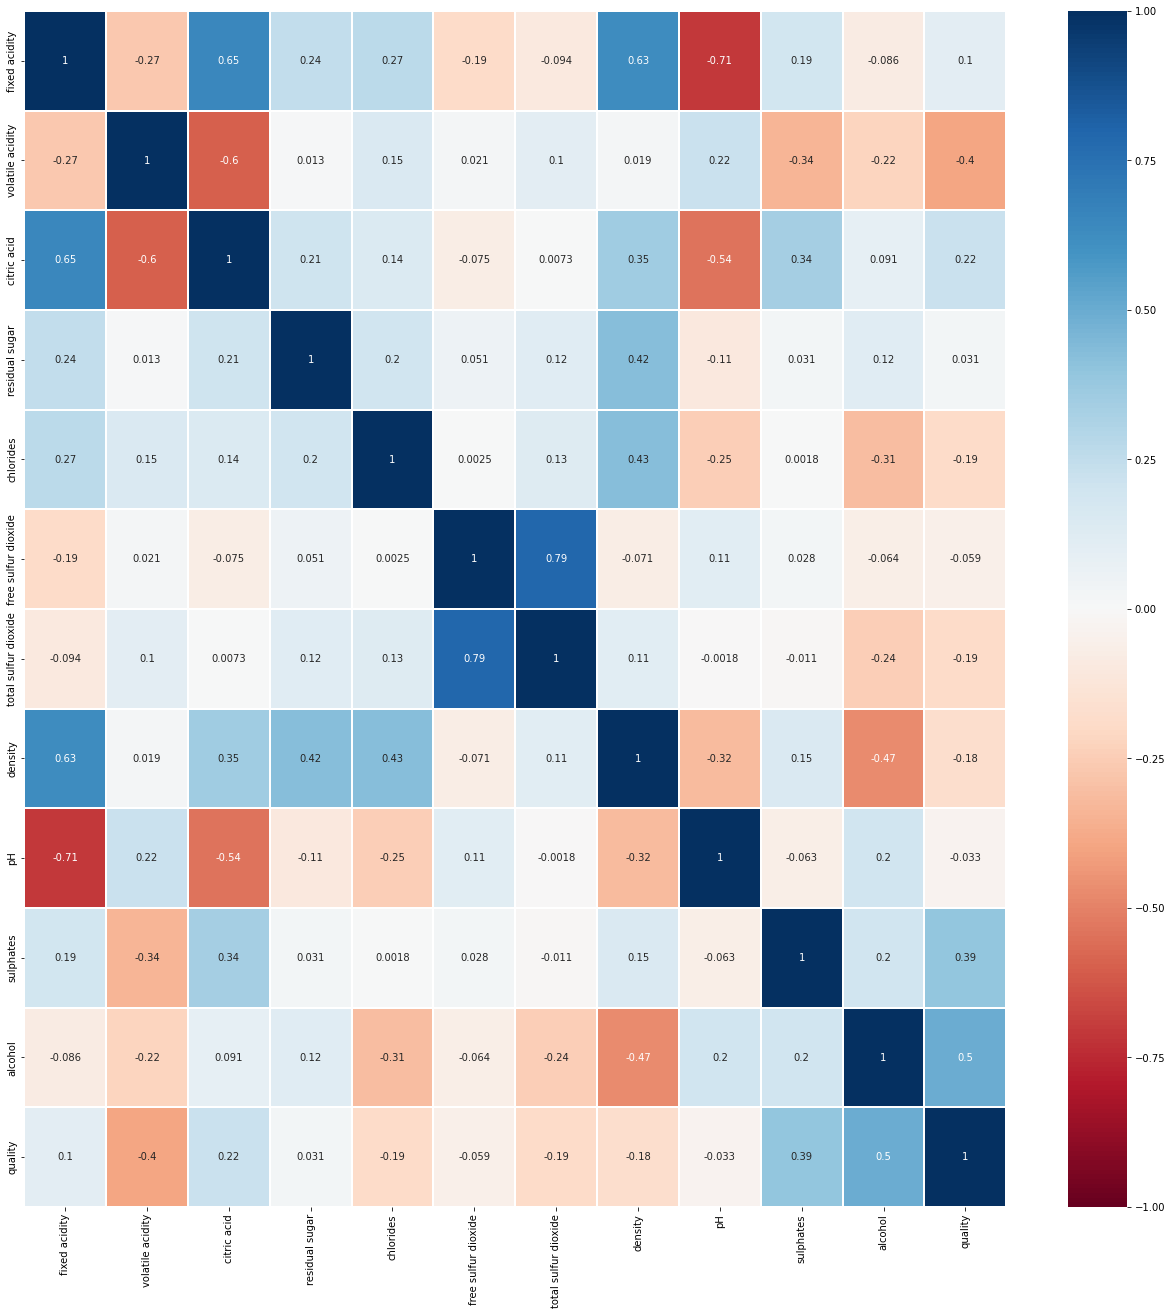

In [9]:
# check correlation b/w columns and heat map 

wine_df_corr = wine_df.corr(method="spearman")
plt.figure(figsize=(22,22))
sns.heatmap(wine_df_corr, vmin=-1, vmax=1, cmap='RdBu', annot=True, linewidth=0.1)

In [10]:
# There are extreme outliers in some features
# For this assignment, we will be taking the top four main features with the highest correlation

main_features=['volatile acidity','citric acid','sulphates','alcohol','quality',]

### Model Building 

**Splitting X into training (70%) and testing set (30%)**

In [11]:
new_wine_df = wine_df[main_features].copy()

# Shuffling dataset
new_wine_df = new_wine_df.sample(frac=1)

# Splitting dataset
total_size = len(new_wine_df)
train_size = round(total_size*0.7)

df_train = new_wine_df.iloc[0:train_size,:]
df_test = new_wine_df.iloc[train_size:total_size,:]

print("Training size: ", len(df_train))
print("Testing size: ", len(df_test))

Training size:  800
Testing size:  343


**Splitting features and labels**


In [12]:
# Training data 

df_Ytrain = df_train['quality']
df_Xtrain = df_train.drop(['quality'], axis=1)

Xtrain = np.insert(np.array(df_Xtrain), 0, np.ones(df_Xtrain.shape[0]), axis=1) # inserting ones-vector to the left column of dataset

# Testing data 

df_Ytest = df_test['quality']
df_Xtest = df_test.drop(['quality'], axis=1)

Xtest = np.insert(np.array(df_Xtest), 0, np.ones(df_Xtest.shape[0]), axis=1) # inserting ones-vector to the left column of dataset


In [13]:
print(Xtrain)

[[ 1.    0.52  0.42  0.61 10.5 ]
 [ 1.    0.39  0.12  0.49  9.4 ]
 [ 1.    0.42  0.24  0.74 14.  ]
 ...
 [ 1.    0.32  0.23  0.62 10.1 ]
 [ 1.    0.43  0.31  0.54  9.9 ]
 [ 1.    0.43  0.49  0.64  9.5 ]]


**Basic Implementation**

In [14]:
# HYPOTHESIS FUNCTION

def h(X,weights):
    # return X.dot(weights)
    # return np.matmul(X,weights)
    return X @ weights

# COST FUNCTION

def cost(X,y,w): 
    # cost = np.sum(pow((X.dot(w)-y),2)/(2*len(y)))
    cost = ((h(X,w)-y).T @ (h(X,w)-y))/2*len(y)
    return cost 


In [15]:
# GRADIENT DESCENT

def gradient_descent(X,y,alpha=0.01,epsilon=pow(10,-5)):

    #initializations
    n = len(y)
    no_iter = 0
    J_all = []
    w = np.zeros(X.shape[1])

    h_x = h(X, w)
    loss = h_x - y

    weight_gradient = X.T.dot(loss)/n
    w_new = w - alpha * weight_gradient

    J_all.append(cost(X,y,w_new))

    while np.linalg.norm(w_new-w) >= epsilon:
        w = w_new

        h_x = h(X, w)
        loss = h_x - y

        weight_gradient = X.T.dot(loss)/n
        w_new = w - alpha * weight_gradient

        J_all.append(cost(X,y,w_new))

        no_iter += 1

    return w_new, J_all, no_iter

In [16]:
def predict(X,w): # same as hypothesis function
    return X.dot(w)

def accuracy_np(y_pred,y): # compares the predicted values to actual values and gives accuracy score
    match = 0
    for i in range(len(y)):
        if y_pred[i] == y[i]:
            match += 1

    return (match/len(y))*100

In [17]:
def RMSE(y_pred,y_actual): # Root Mean Squared Error

    MSE = np.square(np.subtract(y_actual,y_pred)).mean() 
    return math.sqrt(MSE)

In [18]:
# Plot our cost per iteration 

def plot_cost(J_all):

    plt.title("Cost vs Iteration")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")

    plt.plot(J_all)
    plt.show()

In [19]:
# Plot the output (both predicted and expected) for each data entry

def plot_output(X,y,weights):

    """
    Plots the the data points (by ID) against both the predicted output and actual out put

    """

    n = len(y)
    x_axis = np.linspace(0,n,num=n)
    predicted_y = np.round(h(X,weights))

    # plot 
    fig,ax = plt.subplots()

    ax.scatter(x_axis, predicted_y, linewidth=0.5, label='hypothesis', color='blue', marker='o')
    ax.scatter(x_axis, y, linewidth=0.5, label='actual output', color='red', marker='^')

    plt.xlabel("Data point")
    plt.ylabel("Quality")

    plt.legend(bbox_to_anchor =(0.65, 1.25))
    plt.show()

In [20]:
# Performing gradient descent 

weights, J_all,k= gradient_descent(Xtrain, df_Ytrain)
print("no. iterations: ", k)
print("Weights: ", weights)

no. iterations:  46936
Weights:  [ 2.65894499 -1.22535652  0.06181588  0.60698174  0.30978938]


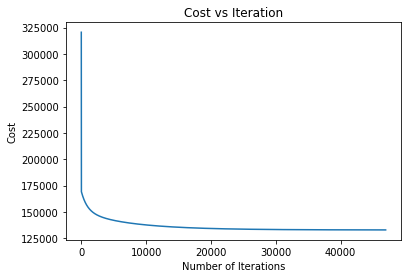

In [21]:
plot_cost(J_all)

In [22]:
#Training the model
# For all our predictions, we round our prediction value to get a whole number matching that of the actual outcome. 


y_pred = np.round(predict(Xtrain,weights)) 
accuracy_np(y_pred,np.array(df_Ytrain))

59.0

In [23]:
# Comparing prediction to built in model
regr = LinearRegression()
regr.fit(np.array(df_Xtrain), np.array(df_Ytrain))
preds = np.round(regr.predict(np.array(df_Xtrain)))

accuracy_np(preds,np.array(df_Ytrain))

59.0

In [24]:
# Testing the model 
y_predT = np.round(predict(Xtest,weights))
accuracy_np(y_predT,np.array(df_Ytest))

59.475218658892125

In [25]:
# Comparing test prediction to built in model
preds_test = np.round(regr.predict(np.array(df_Xtest)))
accuracy_np(preds_test, np.array(df_Ytest))

60.64139941690962

In [26]:
train_rmse = RMSE(y_pred,np.array(df_Ytrain))
test_rmse = RMSE(y_predT,np.array(df_Ytest))

print("Training RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Training RMSE:  0.7071067811865476
Test RMSE:  0.6893610511858994


Comment: The RMSE for training and test should be quite similar to suggest that a good model has been built. Training > Test means that there is some overfitting in our model. However, we have the opposite which suggests that there is a slight under fitting. See diagrams below

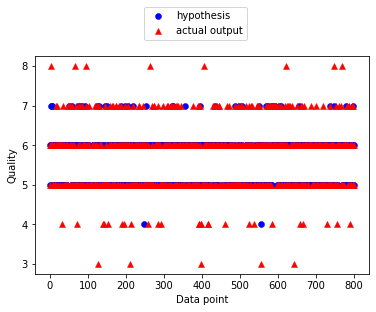

In [27]:
# Training Visual 
plot_output(Xtrain,np.array(df_Ytrain),weights)

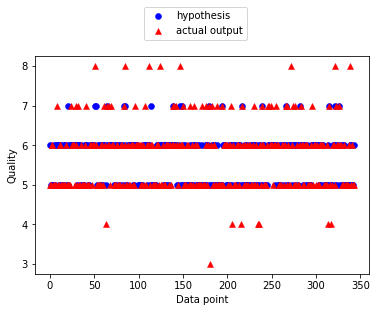

In [28]:
# Test Visual 
plot_output(Xtest,np.array(df_Ytest),weights)

### Exploring the effect of different learning rates on convergence

The above implementation had a learning rate = 0.01

Iterations: ~48 900

Result: Converges

Conclusion: Learning rate is good size 

See below: 

learning rate = 0.1

Iterations: ~300

Result: Diverges

Conclusion: Learning rate is too big 

no. iterations:  302


/var/folders/gh/gt862nnn0pzcpy32nnk1p8bh0000gn/T/ipykernel_10836/2813745503.py:12: RuntimeWarning: overflow encountered in double_scalars
  cost = ((h(X,w)-y).T @ (h(X,w)-y))/2*len(y)
/var/folders/gh/gt862nnn0pzcpy32nnk1p8bh0000gn/T/ipykernel_10836/1562155090.py:26: RuntimeWarning: invalid value encountered in subtract
  w_new = w - alpha * weight_gradient


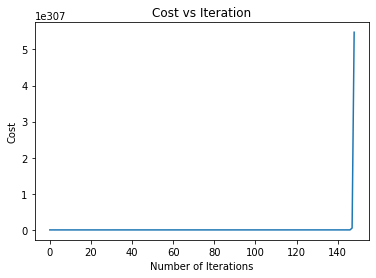

In [29]:
# Performing gradient descent 

weights, J_all,k = gradient_descent(Xtrain, df_Ytrain,0.1)
print("no. iterations: ", k)

plot_cost(J_all)

See below:

learning rate = 0.001

Iterations: ~97 000

Result: Converges

Conclusion: Learning rate is too small. Gradient descent takes long to converge

no. iterations:  94392


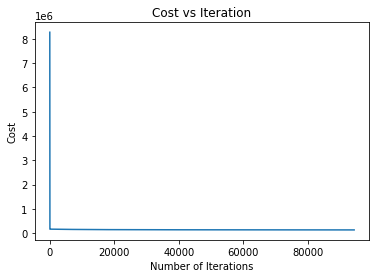

In [30]:
# Performining gradient descent 

weights, J_all,k = gradient_descent(Xtrain, df_Ytrain,0.001)
print("no. iterations: ", k)

plot_cost(J_all)

See below:

learning rate = 0.015

Iterations: ~37 00

Result: Converges

Conclusion: Quickest convergence. Best step size

no. iterations:  35723


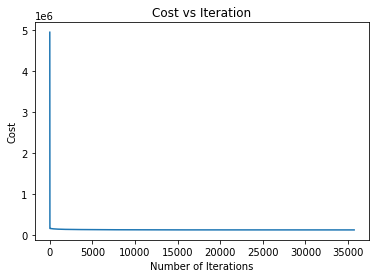

In [31]:
# Performing gradient descent 

weights, J_all,k = gradient_descent(Xtrain, df_Ytrain, 0.015)
print("no. iterations: ", k)

plot_cost(J_all)

### Feature scaling, Feature standardization & Regularization for improved learning

 #### Normalization

In [32]:
# Performing a min-max scaling (training data)
# This scaling restricts the range of values of each feature to be between [0,1]

df_Xnorm = (df_Xtrain-df_Xtrain.min())/(df_Xtrain.max()-df_Xtrain.min())
Xnorm = np.insert(np.array(df_Xnorm), 0, np.ones(df_Xnorm.shape[0]), axis=1) # inserting ones-vector to the left column of dataset

df_Xnorm = pd.DataFrame(Xnorm)
df_Xnorm.head()

,0,1,2,3,4
0,1.0,0.273973,0.42,0.167665,0.323077
1,1.0,0.184932,0.12,0.095808,0.153846
2,1.0,0.205479,0.24,0.245509,0.861538
3,1.0,0.191781,0.48,0.287425,0.200000
4,1.0,0.184932,0.40,0.299401,0.384615


In [33]:
df_Xnorm.describe()

,0,1,2,3,4
count,800.0,800.000000,800.000000,800.000000,800.000000
mean,1.0,0.285467,0.267400,0.196572,0.315138
std,0.0,0.126790,0.198685,0.100799,0.167671
min,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.191781,0.087500,0.131737,0.169231
50%,1.0,0.273973,0.250000,0.173653,0.276923
75%,1.0,0.359589,0.420000,0.239521,0.419231
max,1.0,1.000000,1.000000,1.000000,1.000000


In [34]:
# Scaling testing data

df_Xnorm_test = (df_Xtest-df_Xtest.min())/(df_Xtest.max()-df_Xtest.min())
Xnorm_test = np.insert(np.array(df_Xnorm_test), 0, np.ones(df_Xnorm_test.shape[0]), axis=1) 

In [35]:
# Performing gradient descent 

weights_norm, J_norm, k_norm = gradient_descent(Xnorm, df_Ytrain)
print("no. iterations: ", k_norm)
print("weights_norm: ", weights_norm)


no. iterations:  40337
weights_norm:  [ 5.31990738 -1.76874568  0.0737374   1.00786227  1.97299619]


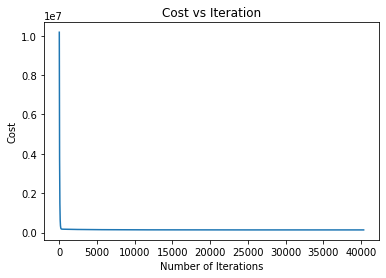

In [36]:
plot_cost(J_norm)

In [37]:
# Train model

Ypred_norm = np.round(predict(Xnorm,weights_norm))
accuracy_np(Ypred_norm,np.array(df_Ytrain))

58.875

In [38]:
# Testing model

Ytest_norm = np.round(predict(Xnorm_test,weights_norm))
accuracy_np(Ytest_norm,np.array(df_Ytest))


58.01749271137027

In [39]:
train_rmse = RMSE(Ypred_norm,np.array(df_Ytrain))
test_rmse = RMSE(Ytest_norm,np.array(df_Ytest))

print("Training RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Training RMSE:  0.7106335201775947
Test RMSE:  0.7244179326244428


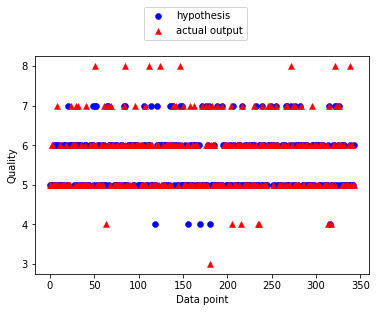

In [40]:
# Test Visual 
plot_output(Xnorm_test,np.array(df_Ytest),weights_norm)

Observation: 

Normalising the data resulted in the gradient descent converging in fewer iteration (40 000 < 48 000). In addition to that, there was no real improvement in the performances overall, with the model performing similarly on the training data and worse on the test data. However, looking at the Root Mean Square Error (RMSE) for both training and testing, reveals that model is built better since the values are much closer to eachother.

#### Standardization

In [41]:
# Performing standardization (training data)
# This technique restricts the mean of the values to zero and the standard deviation to one 

df_Xstd = (df_Xtrain-df_Xtrain.mean())/df_Xtrain.std()
Xstd = np.insert(np.array(df_Xstd), 0, np.ones(df_Xstd.shape[0]), axis=1) # inserting ones column after standardization

df_Xstd = pd.DataFrame(Xstd)

df_Xstd.describe()

,0,1,2,3,4
count,800.0,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,1.0,7.549517e-17,-1.243450e-16,-3.286260e-16,-9.392487e-16
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-2.251484e+00,-1.345847e+00,-1.950128e+00,-1.879506e+00
25%,1.0,-7.389028e-01,-9.054521e-01,-6.432112e-01,-8.702009e-01
50%,1.0,-9.065360e-02,-8.757569e-02,-2.273739e-01,-2.279157e-01
75%,1.0,5.846060e-01,7.680489e-01,4.260847e-01,6.208184e-01
max,1.0,5.635548e+00,3.687239e+00,7.970561e+00,4.084571e+00


In [42]:
# Standardized testing data

df_Xstd_test = (df_Xtest-df_Xtest.mean())/df_Xtrain.std()
Xstd_test = np.insert(np.array(df_Xstd_test), 0, np.ones(df_Xstd_test.shape[0]), axis=1)

In [43]:
# Performing gradient descent 

weights_std, J_std, k_std = gradient_descent(Xstd, df_Ytrain,0.015)
print("no. iterations: ", k_std)
print("weights_std: ", weights_std)

no. iterations:  651
weights_std:  [ 5.65470293 -0.23626553  0.0084626   0.09721795  0.32804722]


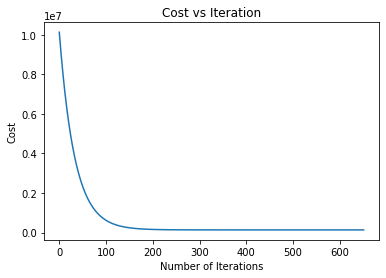

In [44]:
plot_cost(J_std)

In [45]:
# Train model

Ypred_std = np.round(predict(Xstd,weights_std))
accuracy_np(Ypred_std,np.array(df_Ytrain))


59.0

In [46]:
# Test model

Ytest_std = np.round(predict(Xstd_test,weights_std))
accuracy_np(Ytest_std,np.array(df_Ytest))


60.05830903790087

In [47]:
train_rmse = RMSE(Ypred_std,np.array(df_Ytrain))
test_rmse = RMSE(Ytest_std,np.array(df_Ytest))

print("Training RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Training RMSE:  0.7097534783289196
Test RMSE:  0.6977682039705616


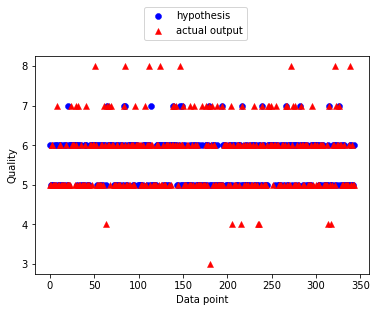

In [48]:
# Std Test Visual 
plot_output(Xstd_test,np.array(df_Ytest),weights_std)

Observation:

Standardising the data resulted in gradient descent converging in significantly fewer iterations (711). Performance on the test data is similar to the first principle implementation. The RMSE errors for training and testing are the same as the first principle implementation too. This suggests that standardising the data might be the best improvement on the learning of the data so far

#### Regularization

In [49]:
def cost_reg(X,y,w,L):
    # cost = np.sum(pow((X.dot(w)-y),2)/(2*len(y))) + (L * w.dot(w))
    cost = ((h(X,w)-y).T @ (h(X,w)-y))/(2*len(y)) + (L * (w[1:].T @ w[1:]))
    return cost 
    

In [61]:
# GRADIENT DESCENT FOR REGULARIZATION

def GD_reg(X,y,L,alpha=0.01,epsilon=pow(10,-5)):

    #initializations
    n = len(y)
    no_iter = 0
    J_all = []
    w = np.zeros(X.shape[1]) 

    h_x = h(X, w)
    loss = h_x - y

    weight_gradient = X.T.dot(loss)/n
    w_new = w*(1-(alpha*L/n)) - alpha * weight_gradient

    J_all.append(cost_reg(X,y,w_new,L))

    while np.linalg.norm(w_new-w) >= epsilon:
        w = w_new

        h_x = h(X, w)
        loss = h_x - y

        weight_gradient = X.T.dot(loss)/n
        w_new = w*(1-(alpha*L/n)) - alpha * weight_gradient

        J_all.append(cost_reg(X,y,w_new,L))

        no_iter += 1

    return w_new, J_all, no_iter

In [62]:
# Regularisation parameter = 0.01

L = 0.01

weights_reg, J_allReg ,k_reg = GD_reg(Xtrain, df_Ytrain, L)
print("no. iterations: ", k_reg)
print("Weights Reg: ", weights_reg)

no. iterations:  46840
Weights Reg:  [ 2.65385223 -1.22340272  0.0626317   0.6075291   0.31011788]


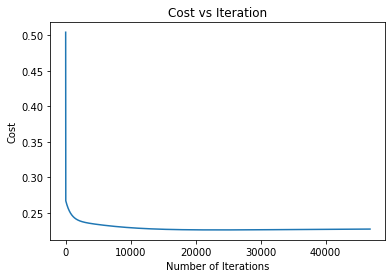

In [63]:
plot_cost(J_allReg)

In [64]:
#Training the model

Ypred_reg = np.round(predict(Xtrain,weights_reg))
accuracy_np(Ypred_reg,np.array(df_Ytrain))

59.0

In [65]:
# Testing the model 

Ytest_reg = np.round(predict(Xtest,weights_reg))
accuracy_np(Ytest_reg,np.array(df_Ytest))

59.475218658892125

In [66]:
train_rmse = RMSE(Ypred_reg,np.array(df_Ytrain))
test_rmse = RMSE(Ytest_reg,np.array(df_Ytest))

print("Training RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Training RMSE:  0.7071067811865476
Test RMSE:  0.6893610511858994


Observation: Learning parameter too small. No effect on the learning.

no. iterations:  45993
Weights Reg:  [ 2.60892691 -1.20616022  0.06982309  0.61229773  0.31301928]


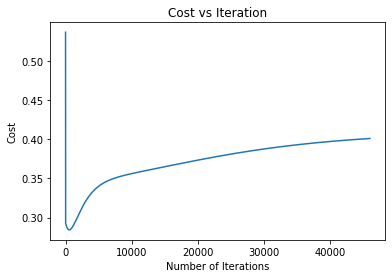

In [67]:
# Regularisation parameter = 0.1

L = 0.1

weights_reg, J_allReg ,k_reg = GD_reg(Xtrain, df_Ytrain, L)
print("no. iterations: ", k_reg)

print("Weights Reg: ", weights_reg)

plot_cost(J_allReg)

In [68]:
#Training the model

Ypred_reg = np.round(predict(Xtrain,weights_reg))
accuracy_np(Ypred_reg,np.array(df_Ytrain))

59.12500000000001

In [69]:
# Testing the model 

Ytest_reg = np.round(predict(Xtest,weights_reg))
accuracy_np(Ytest_reg,np.array(df_Ytest))

59.183673469387756

In [70]:
train_rmse = RMSE(Ypred_reg,np.array(df_Ytrain))
test_rmse = RMSE(Ytest_reg,np.array(df_Ytest))

print("Training RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Training RMSE:  0.7062223445912768
Test RMSE:  0.6914724222896904


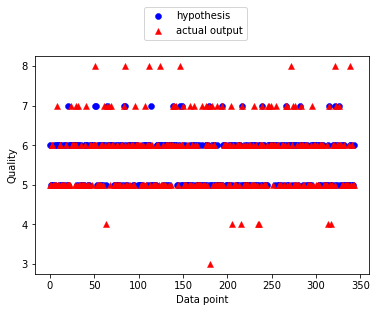

In [71]:
# Reg Test Visual 
plot_output(Xtest,np.array(df_Ytest),weights_reg)

Observation: A larger regularization parameter results in our cost bouncing once at the minimum. However, the technique does improve the learning, as the performance on the testing data is better than that of the first principle implementation.

Observations:

Since there is little to no overfitting in the model, regularisation has little effect in terms of generalising the model further and hence, improving the performance of the model